# Example

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pretrained VGG16 model without the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False)

# Add custom fully connected layers for binary gender classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pretrained VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of the model
model.summary()


58889256/58889256 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
import pandas as pd

# Load CSV data
data = pd.read_csv('sex.csv')

# Replace labels "1" with "male" and "0" with "female"
data['sex'] = data['sex'].map({1: 'male', 0: 'female'})

# Save the modified data to a new CSV file
data.to_csv('train.csv', index=False)


In [3]:
data = pd.read_csv('train.csv')
data.head()

,file,sex
0,07c9e96d2b2d027eeb5a31cd0c5fdac5.jpg.1.jpg,male
1,08c4673ede36d0918c16f9c9bf67d044.jpg.1.jpg,male
2,12248378c19bbc90bf68855354f80866.jpg.2.jpg,male
3,13be70023ba30160c110532bd3c4befa.jpg.2.jpg,male
4,18452bbea26f586116499481e9d4bb3b.jpg.1.jpg,male


In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the paths to the images
data['file'] = 'CineFace1.0/' + data['file']

# Create an image generator from the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the images and labels from the generator
train_generator = datagen.flow_from_dataframe(
    data,
    x_col='file',
    y_col='sex',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    data,
    x_col='file',
    y_col='sex',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load the pretrained VGG16 model without the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False)

# Add custom fully connected layers for binary gender classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pretrained VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Found 35812 validated image filenames belonging to 2 classes.
Found 8953 validated image filenames belonging to 2 classes.
Epoch 1/10
1119/1119 [==============================] - 342s 296ms/step - loss: 0.3026 - accuracy: 0.8663 - val_loss: 0.2055 - val_accuracy: 0.9138
Epoch 2/10
1119/1119 [==============================] - 595s 532ms/step - loss: 0.2406 - accuracy: 0.8992 - val_loss: 0.2019 - val_accuracy: 0.9154
Epoch 3/10
1119/1119 [==============================] - 346s 310ms/step - loss: 0.2263 - accuracy: 0.9041 - val_loss: 0.1816 - val_accuracy: 0.9238
Epoch 4/10
1119/1119 [==============================] - 329s 294ms/step - loss: 0.2154 - accuracy: 0.9093 - val_loss: 0.2342 - val_accuracy: 0.8998
Epoch 5/10
1119/1119 [==============================] - 329s 294ms/step - loss: 0.2116 - accuracy: 0.9111 - val_loss: 0.1724 - val_accuracy: 0.9284
Epoch 6/10
1119/1119 [==============================] - 329s 294ms/step - loss: 0.2014 - accuracy: 0.9159 - val_loss: 0.1699 - val_accura

In [5]:
# save the model
model.save('gender_classification_model.h5')


1/1 [==============================] - 0s 166ms/step
Gender prediction: male


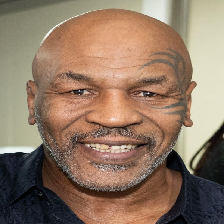

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pretrained model
model = load_model('gender_classification_model.h5')

# Load a new image to test
img_path = "4726017.jpg"
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Normalize the image pixels
x /= 255.

# Make the prediction
predictions = model.predict(x)

# Interpret the prediction
if predictions[0][0] >= 0.5:
    gender = 'male'
else:
    gender = 'female'

# Display the result
print("Gender prediction:", gender)
img


1/1 [==============================] - 0s 24ms/step
Gender prediction: male


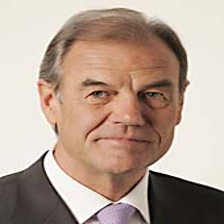

In [10]:
import requests
from io import BytesIO
from PIL import Image

# Download the image from the URL
img_url = 'https://www.europarl.europa.eu/mepphoto/2307.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Resize and preprocess the image
img = img.resize((224, 224))
# Convert the image to a numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Normalize the image pixels
x /= 255.

predictions = model.predict(x)

if predictions[0][0] >= 0.5:
    gender = 'male'
else:
    gender = 'female'

print("Gender prediction:", gender)
img

1/1 [==============================] - 0s 27ms/step
Gender prediction: female


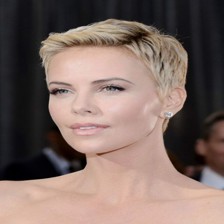

In [11]:
# Download the image from the URL
img_url = 'https://cdn-fcfeo.nitrocdn.com/GcPBUSjpezDxBZwRFhYayZqMDzWtPpqM/assets/images/optimized/rev-369e194/premiere-impression.com/wp-content/uploads/2022/11/article_crfcc_07-683x1024.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

img = img.resize((224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x /= 255.

predictions = model.predict(x)

if predictions[0][0] >= 0.5:
    gender = 'male'
else:
    gender = 'female'

print("Gender prediction:", gender)
img
